## Imports

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# I skip the exploring part 

In [4]:
data = pd.read_csv('segmentation data.csv', index_col=0)

## Standardization

In [5]:
scaler = StandardScaler()

In [6]:
data_std = scaler.fit_transform(data)

## PCA

In [9]:
pca = PCA()

In [10]:
pca.fit(data_std)

PCA()

In [12]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

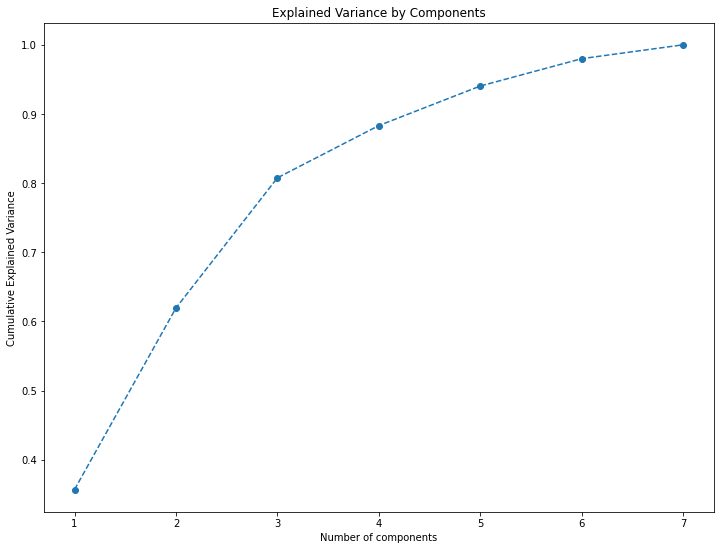

In [13]:
plt.figure(figsize=(12,9))

plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')

plt.title('Explained Variance by Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

How can we choose number of components?

All components variance ratio are up to 100 % percent(1)


We can keep at least 80%, in this example 3 seems quite useful.

In [14]:
pca = PCA(n_components=3)

In [15]:
pca.fit(data_std)

PCA(n_components=3)

In [16]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114])

In [17]:
df_pca_comp = pd.DataFrame(data=pca.components_,
                          columns=data.columns.values,
                          index = ['Component 1', 'Component 2', 'Component 3'])

In [18]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


In [19]:
# let's visualize dataframe to see connection between components

([<matplotlib.axis.YTick at 0x1dcc6fa3040>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

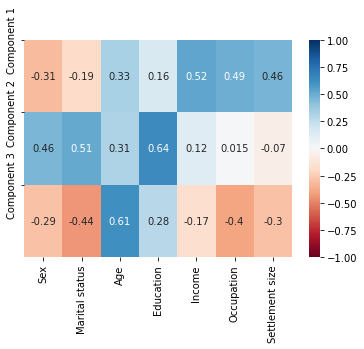

In [20]:
sns.heatmap(df_pca_comp,
           annot=True, vmin=-1, vmax=1, cmap='RdBu')

plt.yticks([0,1,2],
          ['Component 1', 'Component 2', 'Component 3'])

In [22]:
scores_pca = pca.transform(data_std)

## K-means with PCA

In [26]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [27]:
data_segm_pca_kmeans = pd.concat([data.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
data_segm_pca_kmeans.columns.values[-3:] = ['Component 1', 'Component 2', 'Component 3']
data_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [28]:
data_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [29]:
df_segm_pca_analysis = data_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
#df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [30]:
df_segm_pca_analysis['N Obs'] = data_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_analysis['Proportion Obs'] = df_segm_pca_analysis['N Obs'] / df_segm_pca_analysis['N Obs'].sum()

In [31]:
df_segm_pca_analysis= df_segm_pca_analysis.rename(
                        {0:'well-off',
                         1:'fewer-opportunitiers',
                         2:'standard',
                         3:'career focused'})

In [32]:
df_segm_pca_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Proportion Obs
Segment K-means PCA,,,,,,,,,,,,
well-off,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
fewer-opportunitiers,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
standard,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
career focused,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


In [33]:
data_segm_pca_kmeans['Labels'] = data_segm_pca_kmeans['Segment K-means PCA'].map({0:'well-off',
                         1:'fewer-opportunitiers',
                         2:'standard',
                         3:'career focused'})

In [35]:
data_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3,career focused
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,well-off
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,standard
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1,fewer-opportunitiers
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1,fewer-opportunitiers


## Visualizing Segments with PCA

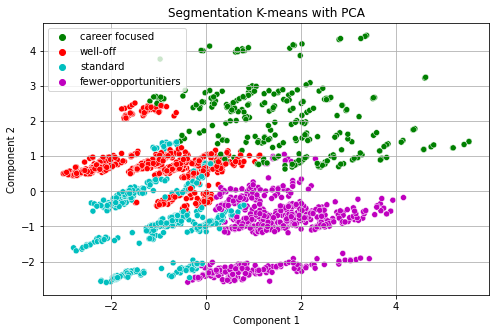

In [45]:
x_axis = data_segm_pca_kmeans['Component 1']
y_axis = data_segm_pca_kmeans['Component 2']

plt.figure(figsize=(8,5))
sns.scatterplot(x=x_axis, y=y_axis, hue = data_segm_pca_kmeans['Labels'], palette = ['g', 'r', 'c', 'm'])
plt.title('Segmentation K-means with PCA')
plt.grid('on')
plt.legend(loc='upper left')
plt.show()

In [46]:
# saving results for further usages

import pickle